In [1]:
%%javascript
require(["codemirror/keymap/sublime", "notebook/js/cell", "base/js/namespace"],
    function(sublime_keymap, cell, IPython) {
        cell.Cell.options_default.cm_config.keyMap = 'sublime';
        var cells = IPython.notebook.get_cells();
        for(var cl=0; cl< cells.length ; cl++){
            cells[cl].code_mirror.setOption('keyMap', 'sublime');
        }
    }
);

<IPython.core.display.Javascript object>

In [2]:
# /nl/umw_job_dekker/users/av90w/projects/for-paper/stem/FC_T6_DEADboxhelicases
# /nl/umw_job_dekker/users/av90w/projects/for-paper/stem/FC_T15_DEADboxhelicases

In [3]:
xxx = ! ssh ghpcc cat /nl/umw_job_dekker/users/av90w/projects/for-paper/stem/FC_T6_DEADboxhelicases

In [4]:
yyy = ! ssh ghpcc cat /nl/umw_job_dekker/users/av90w/projects/for-paper/stem/FC_T15_DEADboxhelicases

In [7]:
clst1_reord2 = [
"DHX15",
"DHX33",
"DHX29",
"DDX23",
"DHX40",
"DDX47",
"DDX1",
"DDX3X",
"DDX49",
"DDX42",
"DDX56",
"EIF4A3",
"DHX9",
"DDX55",
"DDX46",
"DDX10",
"DDX41",
"DHX37",
"DDX51",
"DDX21",
"EIF4A1",
"DHX16",
"DDX59",
"DDX20",
"DDX5",
"DHX35",
"DHX8",
"EIF4A2",
"DDX43",
"DDX19B",
"DDX25",
"DHX38",
"DDX31",
"INTS6",
"DHX34",
"DDX3Y",
"DDX24",
"DDX39A",
"DHX30",
"DHX57",
"DDX27",
"DDX18",
"DDX6",
"DDX52",
"DDX4",
"DDX54",
"DHX36",
"DDX53",
"DDX28",
"DDX50"]

In [8]:
clst1_reord1 = ["DHX40",
"DDX47",
"DDX42",
"DDX49",
"DHX9",
"DDX23",
"DDX56",
"EIF4A3",
"DDX3X",
"DHX33",
"DDX55",
"DHX15",
"DDX1",
"DDX21",
"DHX16",
"DDX46",
"DDX10",
"DHX37",
"DDX51",
"DHX8",
"EIF4A1",
"DHX29",
"DDX41",
"DDX59",
"DDX20",
"DDX5",
"DHX35",
"EIF4A2",
"DDX43",
"DDX19B",
"DDX25",
"DHX38",
"DDX31",
"INTS6",
"DHX34",
"DDX3Y",
"DDX24",
"DDX39A",
"DHX30",
"DHX57",
"DDX27",
"DDX18",
"DDX6",
"DDX52",
"DDX4",
"DDX54",
"DHX36",
"DDX53",
"DDX28",
"DDX50"]

In [9]:
clst2_reord = [
"DDX19B",
"DHX34",
"DDX24",
"DDX39A",
"DHX57",
"DDX27",
"DDX6",
"DHX40",
"DDX47",
"DDX49",
"DDX42",
"DHX9",
"DHX38",
"DDX31",
"DHX33",
"DDX55",
"DHX15",
"DDX18",
"DDX1",
"DDX3X",
"DDX4",
"EIF4A1",
"DDX25",
"DDX3Y",
"DHX30",
"DDX56",
"EIF4A3",
"DDX52",
"DDX23",
"DDX10",
"DDX46",
"DHX37",
"DDX54",
"DDX50",
"DDX21",
"DHX16",
"DHX36",
"DDX53",
"EIF4A2",
"DDX43",
"DDX51",
"DDX28",
"DDX20",
"DHX29",
"INTS6",
"DDX41",
"DDX59",
"DHX8",
"DDX5",
"DHX35"]


In [10]:
clustering2 = ["DDX19B",
"DDX24",
"DDX27",
"DDX39A",
"DDX42",
"DDX47",
"DDX49",
"DDX6",
"DHX34",
"DHX40",
"DHX57",
"DHX9",
"DDX31",
"DDX55",
"DHX33",
"DHX38",
"DDX1",
"DDX18",
"DHX15",
"DDX3X",
"DDX4",
"EIF4A1",
"DDX25",
"DDX3Y",
"DDX56",
"DHX30",
"EIF4A3",
"DDX23",
"DDX52",
"DDX10",
"DDX46",
"DHX37",
"DDX21",
"DDX50",
"DDX54",
"DHX16",
"DHX36",
"DDX53",
"DDX43",
"DDX51",
"EIF4A2",
"DDX20",
"DDX28",
"DDX41",
"DDX59",
"DHX29",
"INTS6",
"DHX8",
"DDX5",
"DHX35"]

In [11]:
clustering1 = ["DDX42",
"DDX47",
"DDX49",
"DHX40",
"DHX9",
"DDX23",
"DDX56",
"EIF4A3",
"DDX3X",
"DDX55",
"DHX33",
"DDX1",
"DHX15",
"DDX21",
"DHX16",
"DDX10",
"DDX46",
"DHX37",
"DDX51",
"DHX8",
"EIF4A1",
"DDX41",
"DDX59",
"DHX29",
"DDX20",
"DDX5",
"DHX35",
"DDX19B",
"DDX25",
"DDX31",
"DDX54",
"DDX6",
"DDX27",
"DDX18",
"DDX24",
"DDX52",
"DDX39A",
"EIF4A2",
"INTS6",
"DDX28",
"DDX43",
"DDX50",
"DDX3Y",
"DDX4",
"DDX53",
"DHX30",
"DHX34",
"DHX36",
"DHX38",
"DHX57"]

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from io import StringIO
from sklearn.cluster import KMeans
%matplotlib inline
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}

In [13]:
df = pd.read_csv(StringIO("\n".join(xxx)),sep="\t").set_index("GENE")
df = pd.read_csv(StringIO("\n".join(yyy)),sep="\t").set_index("GENE")

# idx = np.argsort(np.abs(df["3"]-df["0"]).values/df["0"].values)
# df = df.iloc[idx]

In [62]:
nclust = 5
cls = KMeans(nclust)
# X = np.diff(df.values)
# X = df.values
X = df.values - df.values[:,0].reshape(-1,1)
labels = cls.fit_predict(X)
centroids = cls.cluster_centers_
# np.argsort( np.mean(centroids, axis=1) )
clst_orders = np.argsort( np.mean(centroids, axis=1) )
sorted_idx = np.concatenate([ np.argwhere(labels == i).flatten() for i in range(nclust) ])
#
df2 = df.iloc[sorted_idx]
clst_borders = np.bincount(labels)[clst_orders].cumsum()

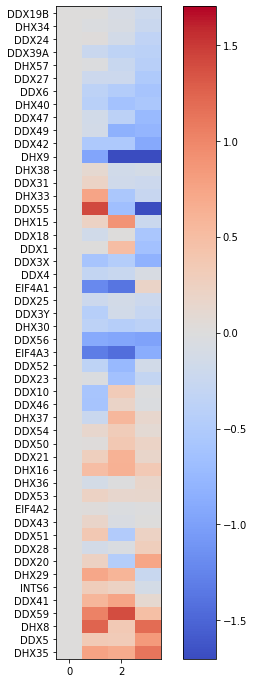

In [22]:
df2 = df.loc[clst2_reord]
plt.figure(figsize=(8,12))
img = plt.imshow(df2.values - df2.values[:,0].reshape(-1,1),
                 aspect=0.5,
                 vmin=-1.7,
                 vmax=1.7,
                 cmap="coolwarm")
# img = plt.imshow(df2.values,aspect=0.5,
#                  vmin=-4,
#                  vmax=4,
#                  cmap="coolwarm")
ax = plt.gca()
# for v in clst_borders[:-1]:
#     ax.axhline(v-.5,lw=5,color="red")
ax.set_yticks(np.arange(len(df2.index)))
ax.set_yticklabels(df2.index)
plt.colorbar(img)
